<a href="https://colab.research.google.com/github/RileyWClarke/MLTSA_RClarke/blob/master/HW6/MLTSA_rclarke_hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MLTSA - Riley Clarke - HW6

In [0]:
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import pandas as pd
% matplotlib inline

In [0]:
plt.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

# Part I.1: Data Collection

Reading in data via Kaggle API:

In [0]:
!pip install kaggle

In [0]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [5]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


In [7]:
ls kaggle.json

kaggle.json


In [0]:
!chmod 600 kaggle.json

In [0]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [10]:
!kaggle competitions list -s PLAsTiCC

ref            deadline             category   reward  teamCount  userHasEntered  
-------------  -------------------  --------  -------  ---------  --------------  
PLAsTiCC-2018  2018-12-17 23:59:00  Featured  $25,000       1094            True  


In [11]:
!mkdir plasticc

mkdir: cannot create directory ‘plasticc’: File exists


In [12]:
cd plasticc

/content/gdrive/My Drive/plasticc


In [13]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [14]:
cd data

/content/gdrive/My Drive/plasticc/data


In [0]:
!kaggle competitions download PLAsTiCC-2018

sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_batch3.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_batch5.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_batch9.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
data_note.pdf.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_batch7.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_batch11.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_batch6.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
training_set.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_sample.csv.zip: Skipping, found mo

In [0]:
ls

data_note.pdf.zip          test_set_batch4.csv.zip  test_set_metadata.csv.zip
sample_submission.csv.zip  test_set_batch5.csv.zip  test_set_sample.csv.zip
test_set_batch10.csv.zip   test_set_batch6.csv.zip  training_set.csv
test_set_batch11.csv.zip   test_set_batch7.csv.zip  training_set.csv.zip
test_set_batch1.csv.zip    test_set_batch8.csv.zip  training_set_metadata.csv
test_set_batch2.csv.zip    test_set_batch9.csv.zip
test_set_batch3.csv.zip    test_set.csv.zip


In [0]:
!unzip training_set.csv.zip

Archive:  training_set.csv.zip
replace training_set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: training_set.csv        


In [0]:
lcvs = pd.read_csv('training_set.csv')
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


# Part I.2: Data Visualization & Feature Extraction

In [0]:
bands = lcvs["passband"].unique()
print("Passbands (filter) identifiers:", bands)

Passbands (filter) identifiers: [2 1 3 4 5 0]


In [0]:
objects = lcvs["object_id"].unique()
print("There are {} astrophysical simulated objects in my dataset".format(objects.shape[0]))

There are 7848 astrophysical simulated objects in my dataset


In [26]:
metadata = pd.read_csv('training_set_metadata.csv')
metadata.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [0]:
metadata.columns

Index(['object_id', 'ra', 'decl', 'gal_l', 'gal_b', 'ddf', 'hostgal_specz',
       'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv', 'target'],
      dtype='object')

In [0]:
print("The metadata dataset contains more information for each time series: (time-series, columns)", metadata.shape)

The metadata dataset contains more information for each time series: (time-series, columns) (7848, 12)


In [0]:
norm_band = Normalize(vmin=bands.min(), vmax=bands.max())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


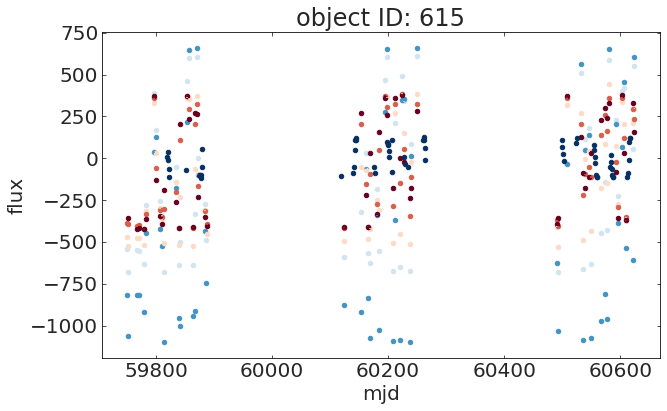

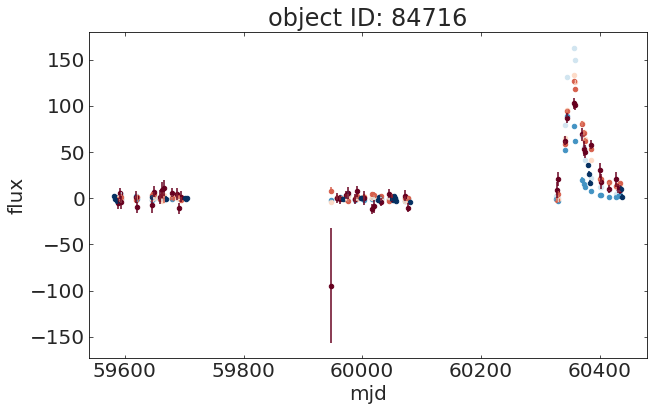

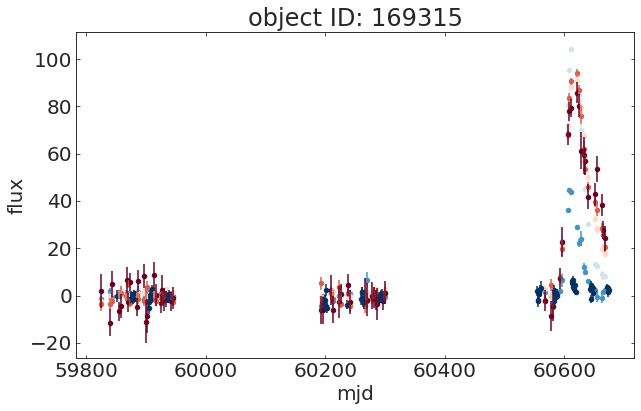

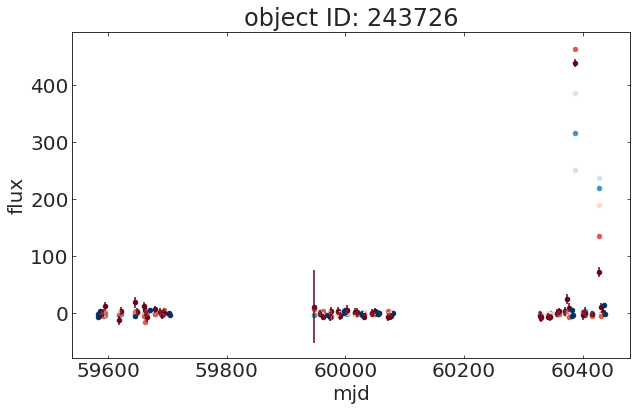

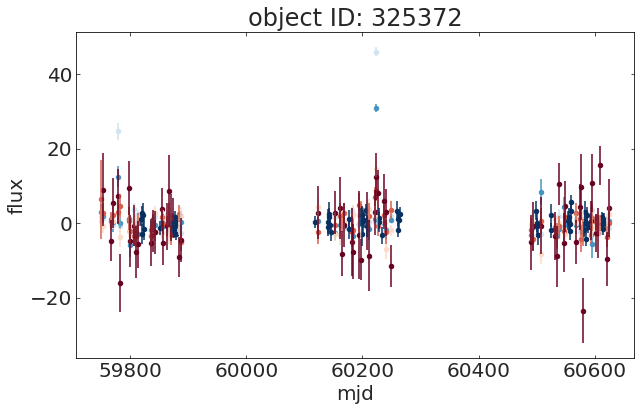

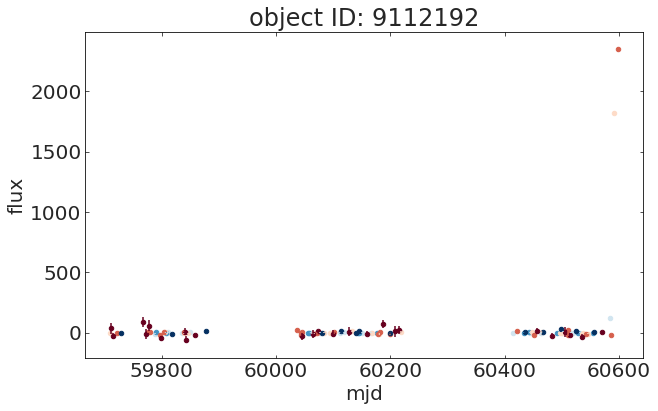

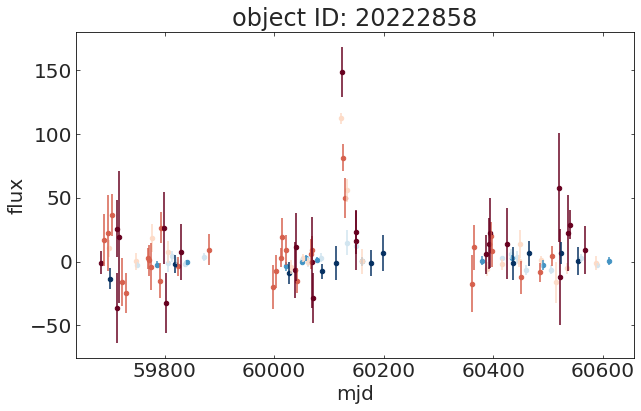

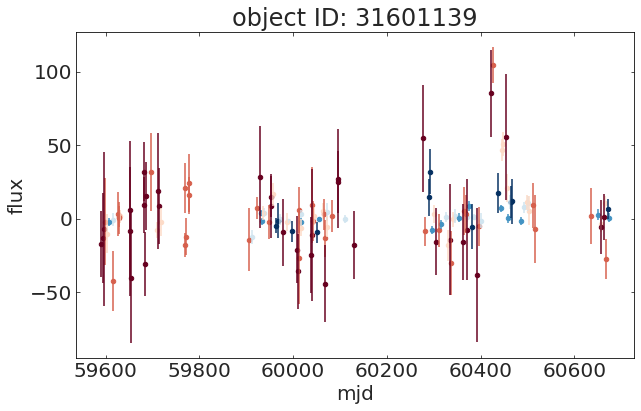

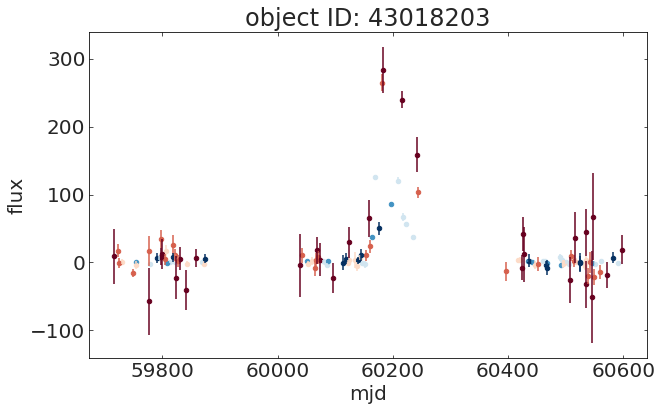

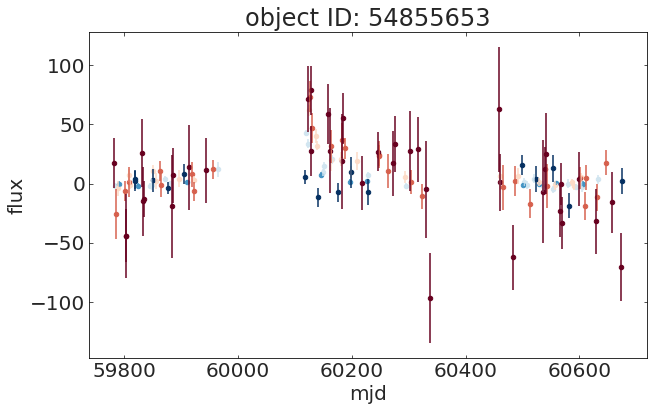

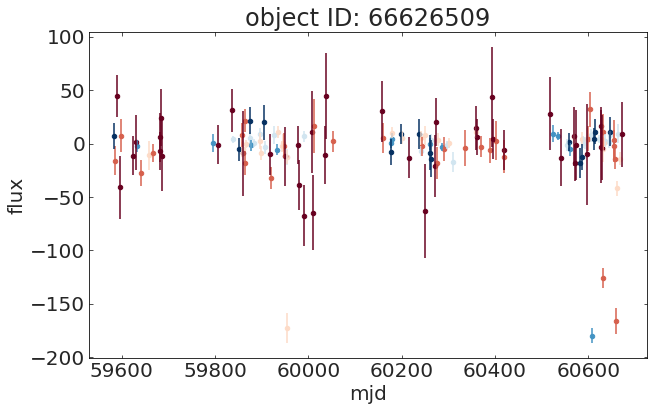

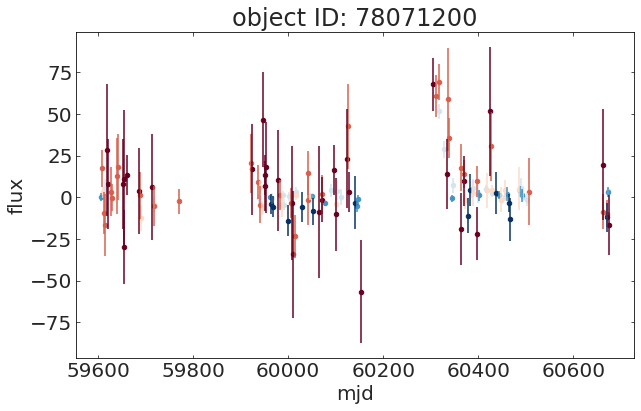

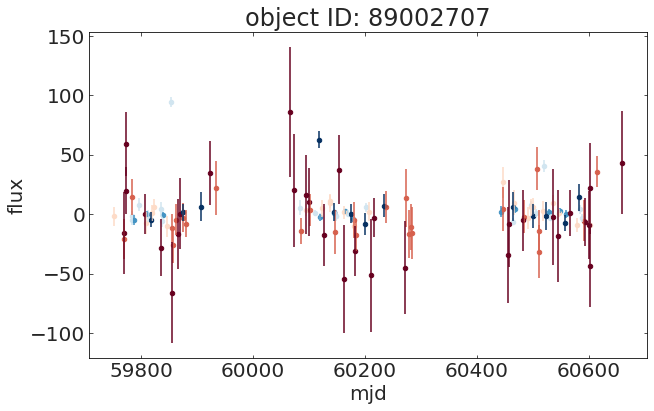

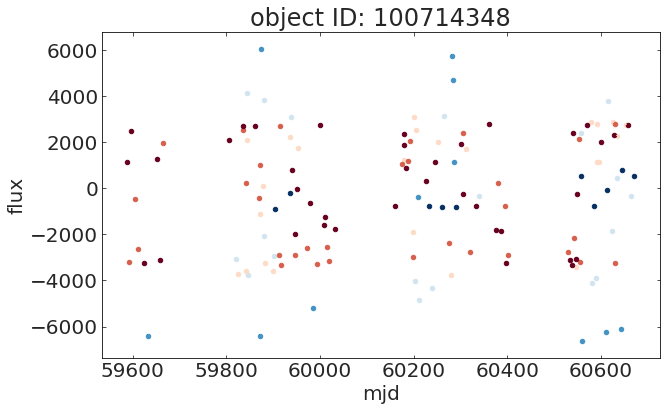

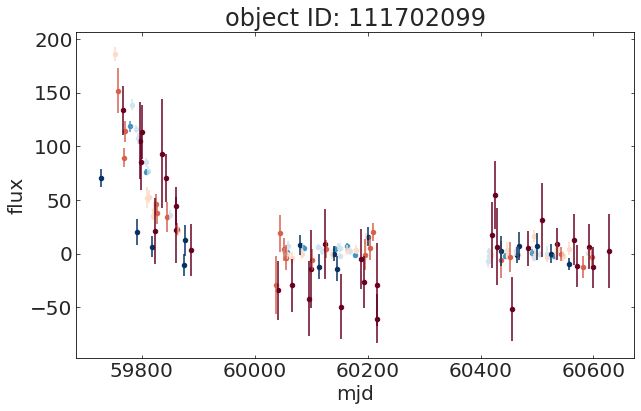

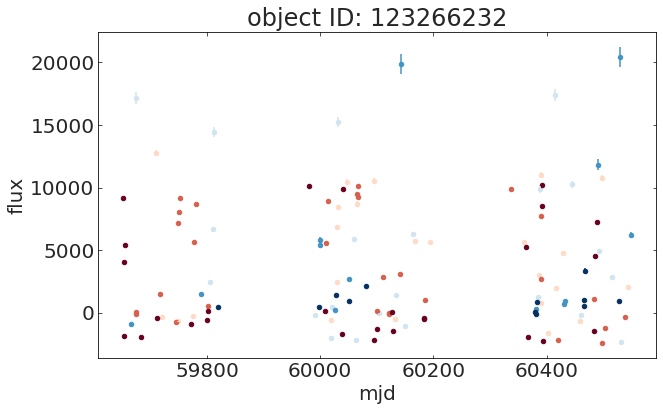

In [0]:
for obj in objects[::500]:
    ax = plt.figure().add_subplot(111)
    for band in bands:
        lcvs[lcvs.object_id == obj][lcvs.passband == band].plot(x="mjd", 
                                            y="flux", yerr="flux_err", ax=ax, kind="scatter", 
                                                                color=plt.cm.RdBu_r(norm_band(band)))
    plt.title("object ID: %d"%obj)

Figure 1: Flux vs. MJD (modified Julian date) for every 10000th object in the dataset + Object 84716. Each object has observations over ~200 days, with three ~200 day observation periods for each object. The objects were observed in 6 filters, denoted by the coloring of each datapoint. Some objects have notable outlier points with very large uncertainties, particularly objects 84716, 2022858 & 66626509.

## Task 4: Feature Extraction

### Task 4.1

Features to extract: 

From original lightcurve:\
-Mean\
-Standard deviation\
-Skewness\
-Kurtosis\
-Minimum\
-Maximum

The above features will be necessary to conduct any sort of statistical inference on the lightcurves


From standardized lightcurve:\
-Median\
-Line fit parameters\
-Quadratic fit parameters

These features will be necessary to analyze model fitting.

From metadata:\
-hostgal_specz\
-mwebv

hostgal_specz is the spectroscopic redshift of the host galaxy and is important if our science case requires that we study primoridal galaxies at very high redshifts, for example.

mwebv is the extincton coefficient, which is crucial if we need to account for the presence of interstellar/intergalactic dust in the line-of-sight of our targets.



### Task 4.2

In [0]:
means = lcvs.groupby(["object_id", "passband"])[["flux"]].mean()
sds = lcvs.groupby(["object_id", "passband"])[["flux"]].std()
mean_err = lcvs.groupby(["object_id", "passband"])[["flux_err"]].mean()

In [0]:
features = means.rename({"flux": "mean"}, 
                        axis=1).merge(sds.rename({"flux": "std"}, 
                                axis=1), left_index=True, right_index=True)

In [0]:
features

mean           std
object_id passband                           
615       0           -3.254554     83.944735
          1         -385.699911    601.787302
          2         -134.146566    455.121346
          3         -121.103501    335.425053
          4          -55.954592    291.803449
...                         ...           ...
130779836 1          725.169852   1197.557111
          2         2690.360415   6440.422386
          3          755.993902   1443.868085
          4         3489.185336  11006.766106
          5         4151.358875   8687.101173

[47088 rows x 2 columns]

In [0]:
from scipy import stats 
def m2f(x):
    return stats.moment(x, moment = 2)
def m3f(x):
    return stats.moment(x, moment = 3)
m2 = lcvs.groupby(["object_id", "passband"])["flux"].apply(m2f)
m3 = lcvs.groupby(["object_id", "passband"])["flux"].apply(m3f)

In [0]:
features = features.merge(m2.rename('m2'), left_index=True, right_index=True)
features = features.merge(m3.rename('m3'), left_index=True, right_index=True)
features

mean           std            m2            m3
object_id passband                                                       
615       0           -3.254554     83.944735  6.934866e+03  7.266579e+04
          1         -385.699911    601.787302  3.559040e+05  8.593916e+07
          2         -134.146566    455.121346  2.035641e+05  3.040627e+07
          3         -121.103501    335.425053  1.105701e+05  1.049664e+07
          4          -55.954592    291.803449  8.368116e+04  4.717542e+06
...                         ...           ...           ...           ...
130779836 1          725.169852   1197.557111  1.314631e+06  2.360077e+09
          2         2690.360415   6440.422386  3.981988e+07  9.572595e+11
          3          755.993902   1443.868085  1.989993e+06  6.673022e+09
          4         3489.185336  11006.766106  1.164893e+08  5.307167e+12
          5         4151.358875   8687.101173  7.169244e+07  1.380872e+12

[47088 rows x 4 columns]

In [0]:
maxs = lcvs.groupby(["object_id", "passband"])[["flux"]].max()
mins = lcvs.groupby(["object_id", "passband"])[["flux"]].min()

In [0]:
features = features.merge(maxs.rename({"flux": "max"}, 
                                axis=1), left_index=True, right_index=True).merge(mins.rename({"flux": "min"}, 
                                axis=1), left_index=True, right_index=True)
features

mean           std  ...           max          min
object_id passband                             ...                           
615       0           -3.254554     83.944735  ...    125.182808  -116.913223
          1         -385.699911    601.787302  ...    660.626343 -1100.440063
          2         -134.146566    455.121346  ...    611.984558  -681.858887
          3         -121.103501    335.425053  ...    445.737061  -530.644592
          4          -55.954592    291.803449  ...    381.953735  -422.184509
...                         ...           ...  ...           ...          ...
130779836 1          725.169852   1197.557111  ...   3320.936279   -34.273514
          2         2690.360415   6440.422386  ...  31437.089844   -14.478923
          3          755.993902   1443.868085  ...   4995.144043   -41.850040
          4         3489.185336  11006.766106  ...  54982.875000   -72.634567
          5         4151.358875   8687.101173  ...  29058.212891   -86.457382

[47088 rows x 6 columns]

## Task 4.3

In [0]:
lcvs["fluxnormed"] = 0.

In [0]:
def normed(df):
    obj, band = df.object_id.values[0], df.passband.values[0]
    df["fluxnormed"] = (df["flux"] - means.loc[obj, band].values[0]) / sds.loc[obj, band].values[0]
    return df
    
    
lcvs = lcvs.groupby(["object_id", "passband"]).apply(normed)

In [0]:
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected,fluxnormed
0,615,59750.4229,2,-544.810303,3.622952,1,-0.902317
1,615,59750.4306,1,-816.434326,5.553370,1,-0.715759
2,615,59750.4383,3,-471.385529,3.801213,1,-1.044293
3,615,59750.4450,4,-388.984985,11.395031,1,-1.141283
4,615,59752.4070,2,-681.858887,4.041204,1,-1.203442


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


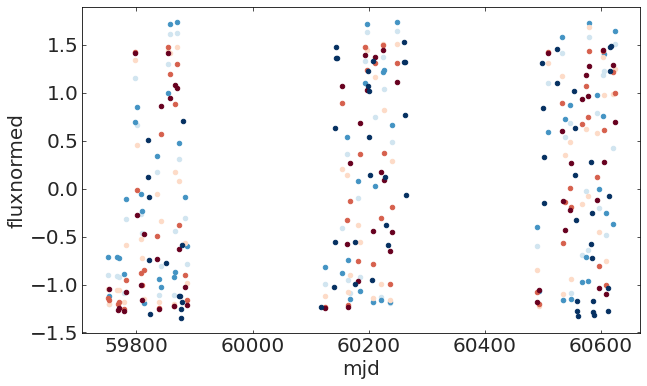

In [0]:
for obj in objects[::10000]:
    ax = plt.figure().add_subplot(111)
    for band in bands:
        lcvs[lcvs.object_id == obj][lcvs.passband == band].plot(x="mjd", y="fluxnormed", ax=ax, kind="scatter",
                                                               color=plt.cm.RdBu_r(norm_band(band)))

Figure 2: Standardized Flux for each 100th object in the dataset

In [0]:
maxs_standardized = lcvs.groupby(["object_id", "passband"])["fluxnormed"].max()
mins_standardized = lcvs.groupby(["object_id", "passband"])["fluxnormed"].min()

In [0]:
medians = lcvs.groupby(["object_id", "passband"])[["fluxnormed"]].median()

features = features.merge(medians.rename({"fluxnormed": "median"}, 
                                axis=1), left_index=True, right_index=True)
features

mean           std  ...          min    median
object_id passband                             ...                       
615       0           -3.254554     83.944735  ...  -116.913223 -0.080537
          1         -385.699911    601.787302  ... -1100.440063 -0.170090
          2         -134.146566    455.121346  ...  -681.858887 -0.289021
          3         -121.103501    335.425053  ...  -530.644592 -0.122434
          4          -55.954592    291.803449  ...  -422.184509 -0.163078
...                         ...           ...  ...          ...       ...
130779836 1          725.169852   1197.557111  ...   -34.273514 -0.513972
          2         2690.360415   6440.422386  ...   -14.478923 -0.355787
          3          755.993902   1443.868085  ...   -41.850040 -0.406302
          4         3489.185336  11006.766106  ...   -72.634567 -0.309318
          5         4151.358875   8687.101173  ...   -86.457382 -0.416662

[47088 rows x 7 columns]

In [0]:
def linfit(x):
    pars = np.polyfit(range(len(x)), x["fluxnormed"].values, 1)
    return pars
linfits = lcvs.groupby(["object_id", "passband"]).apply(linfit)

In [0]:
slopes = [x[0] for x in linfits.values[:]]
intercepts = [x[1] for x in linfits.values[:]]

In [0]:
features["slopes"] = slopes
features["intercepts"] = intercepts
features.head()

mean         std  ...    slopes  intercepts
object_id passband                          ...                      
615       0          -3.254554   83.944735  ...  0.005676   -0.175947
          1        -385.699911  601.787302  ...  0.014032   -0.399902
          2        -134.146566  455.121346  ...  0.017676   -0.503760
          3        -121.103501  335.425053  ...  0.020475   -0.583524
          4         -55.954592  291.803449  ...  0.022343   -0.636786

[5 rows x 9 columns]

In [0]:
from statsmodels.formula.api import ols
def quadfit(x):
    x['t'] = x.mjd - x.iloc[0].mjd
    m1 = ols(formula='fluxnormed~t + 1', data=x).fit()
    m2 = ols(formula='fluxnormed~pow(t, 2) + t + 1', data=x).fit()
    
    pars = m2.llf, m1.llf, np.sign(m2.params[1])
    return pars
ols = lcvs.groupby(["object_id", "passband"]).apply(quadfit)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [0]:
ll1 = [x[0] for x in ols.values[:]]
ll2 = [x[1] for x in ols.values[:]]
ll3 = [x[2] for x in ols.values[:]]
features["ll1"] = ll1
features["ll2"] = ll2
features["ll3"] = ll3
features.head()

mean         std  ...        ll2  ll3
object_id passband                          ...                
615       0          -3.254554   83.944735  ... -88.218652 -1.0
          1        -385.699911  601.787302  ... -80.869998 -1.0
          2        -134.146566  455.121346  ... -80.109763 -1.0
          3        -121.103501  335.425053  ... -79.290039 -1.0
          4         -55.954592  291.803449  ... -78.480261 -1.0

[5 rows x 12 columns]

## Task 5: Adding metadata

In [0]:
allfeatures = features.reset_index().set_index(['object_id','passband']).stack(
    ).unstack([1,2])
allfeatures.head()

passband          0                          ...          5                
               mean        std           m2  ...        ll1        ll2  ll3
object_id                                    ...                           
615       -3.254554  83.944735  6934.865833  ... -76.917754 -77.386461 -1.0
713       -2.720398   7.113509    49.879128  ... -65.167686 -65.424297 -1.0
730       -0.048080   1.828872     3.298318  ... -66.518080 -67.853917  1.0
745        1.797523   4.374445    18.869993  ... -64.783463 -77.536999 -1.0
1124       0.660948   2.360084     5.481586  ... -76.526495 -76.666778  1.0

[5 rows x 72 columns]

In [0]:
metadata.to_pickle('metadata')
metadata.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [0]:
allfeatures = allfeatures.merge(metadata[["object_id", "decl", "ddf", "hostgal_photoz", 
                                         "hostgal_photoz_err", "target"]], on=['object_id']).drop("object_id", axis=1)
allfeatures.to_pickle('allfeatures')
allfeatures.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(0, mean)","(0, std)","(0, m2)","(0, m3)","(0, max)","(0, min)","(0, median)","(0, slopes)","(0, intercepts)","(0, ll1)","(0, ll2)","(0, ll3)","(1, mean)","(1, std)","(1, m2)","(1, m3)","(1, max)","(1, min)","(1, median)","(1, slopes)","(1, intercepts)","(1, ll1)","(1, ll2)","(1, ll3)","(2, mean)","(2, std)","(2, m2)","(2, m3)","(2, max)","(2, min)","(2, median)","(2, slopes)","(2, intercepts)","(2, ll1)","(2, ll2)","(2, ll3)","(3, mean)","(3, std)","(3, m2)","(3, m3)","(3, max)","(3, min)","(3, median)","(3, slopes)","(3, intercepts)","(3, ll1)","(3, ll2)","(3, ll3)","(4, mean)","(4, std)","(4, m2)","(4, m3)","(4, max)","(4, min)","(4, median)","(4, slopes)","(4, intercepts)","(4, ll1)","(4, ll2)","(4, ll3)","(5, mean)","(5, std)","(5, m2)","(5, m3)","(5, max)","(5, min)","(5, median)","(5, slopes)","(5, intercepts)","(5, ll1)","(5, ll2)","(5, ll3)",decl,ddf,hostgal_photoz,hostgal_photoz_err,target
0,-3.254554,83.944735,6934.865833,72665.792850,125.182808,-116.913223,-0.080537,0.005676,-0.175947,-84.013092,-88.218652,-1.0,-385.699911,601.787302,355904.026224,8.593916e+07,660.626343,-1100.440063,-0.170090,0.014032,-0.399902,-80.867915,-80.869998,-1.0,-134.146566,455.121346,203564.138816,3.040627e+07,611.984558,-681.858887,-0.289021,0.017676,-0.503760,-80.092803,-80.109763,-1.0,-121.103501,335.425053,110570.138947,1.049664e+07,445.737061,-530.644592,-0.122434,0.020475,-0.583524,-79.226482,-79.290039,-1.0,-55.954592,291.803449,83681.162283,4.717542e+06,381.953735,-422.184509,-0.163078,0.022343,-0.636786,-78.160027,-78.480261,-1.0,-47.449847,294.779522,85370.493377,3.041829e+06,378.188141,-422.815094,-0.129163,0.021319,-0.596932,-76.917754,-77.386461,-1.0,-61.943836,1,0.0000,0.0000,92
1,-2.720398,7.113509,49.879128,89.634243,14.509829,-14.735178,-0.052914,-0.041433,1.429423,-45.801483,-49.801325,-1.0,-1.019804,5.712334,32.048070,-1.551087e+01,9.129021,-11.715749,0.080189,-0.051648,1.420320,-36.052358,-38.161170,-1.0,-0.794238,5.770738,32.706748,-4.127475e+00,10.529041,-10.067919,0.117188,-0.053887,1.481892,-34.410798,-35.611095,-1.0,-0.986966,6.450413,40.864832,-4.249286e+01,11.330316,-12.394593,0.141552,-0.050983,1.402038,-38.701863,-41.302700,-1.0,-0.900262,6.406989,40.316483,-1.597455e+01,9.827934,-12.286801,0.016870,-0.050464,1.387765,-44.424807,-44.870314,-1.0,-1.794175,7.094073,49.427194,7.377121e+01,14.770886,-14.211164,-0.094281,-0.037903,1.042343,-65.167686,-65.424297,-1.0,-27.784405,1,1.6267,0.2552,88
2,-0.048080,1.828872,3.298318,2.093148,5.942166,-3.459960,0.039463,-0.001798,0.063840,-101.249926,-101.606902,-1.0,0.141057,1.807229,3.203266,2.623669e+00,5.693109,-3.393080,0.016754,0.003167,-0.080770,-72.910038,-73.012277,-1.0,2.400870,5.559483,30.313471,3.864890e+02,20.994711,-2.848838,-0.343392,0.026905,-0.686084,-63.777334,-65.193298,1.0,3.236164,8.191987,65.818099,1.380135e+03,33.572102,-5.435799,-0.314425,0.024491,-0.624531,-66.369632,-66.683538,1.0,4.308728,10.710344,112.462234,2.936931e+03,41.159981,-5.836310,-0.308522,0.022552,-0.563811,-65.239486,-66.161110,1.0,4.539396,13.332758,174.276892,3.751336e+03,47.310059,-19.159811,-0.149763,0.019612,-0.490299,-66.518080,-67.853917,1.0,-6.579593,1,0.2262,0.0157,42
3,1.797523,4.374445,18.869993,162.368381,18.014029,-3.874349,-0.169349,-0.013089,0.464675,-88.423048,-100.184915,-1.0,5.717394,25.964659,662.124902,1.161627e+05,192.244293,-3.618410,-0.185994,-0.003826,0.105205,-76.313623,-78.932796,-1.0,9.711532,31.957997,1003.075853,1.758302e+05,220.795212,-2.159753,-0.290606,-0.003878,0.106641,-72.846380,-78.938052,-1.0,14.412924,34.967698,1200.905234,1.519142e+05,203.250702,-4.944036,-0.373246,-0.003931,0.108112,-67.105516,-78.945375,-1.0,13.134436,33.069053,1074.034376,1.190633e+05,183.633118,-15.494463,-0.358773,-0.004774,0.131296,-67.067827,-78.924149,-1.0,10.746138,26.060130,666.782529,5.309464e+04,141.513290,-10.249387,-0.306851,-0.002816,0.076043,-64.783463,-77.536999,-1.0,-45.586655,1,0.2813,1.1523,90
4,0.660948,2.360084,5.481586,-4.160853,5.330927,-6.804703,-0.03

In [0]:
print("My feature space is {} features (columns)".format(allfeatures.shape[1]))

My feature space is 77 features (columns)


## Task 6: Preprocessing

In [0]:
allfeatures = pd.read_pickle('allfeatures')

In [16]:
print("there are {} NaN and {} infinity entries".format(
 (allfeatures.isna().sum().sum()), np.prod(allfeatures.shape) - (np.isfinite(allfeatures).sum().sum())))

there are 0 NaN and 1 infinity entries


In [0]:
allfeatures = allfeatures.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [18]:
X = allfeatures.iloc[:,:-1]
y = allfeatures.iloc[:,-1]

featuremeans = X.mean()
featurestd = X.std()
print("saved means and standard deviation arrays", featuremeans, featurestd)
print("number of observcations {}, features {}, means {}, standard deviations {}".format(
    *X.shape, featuremeans.shape[0], featurestd.shape[0]))
    

saved means and standard deviation arrays (0, mean)             3.927376e+01
(0, std)              2.182559e+02
(0, m2)               1.174025e+08
(0, m3)               9.320874e+13
(0, max)              5.238822e+02
                          ...     
(5, ll3)              2.548420e-02
decl                 -2.725485e+01
ddf                   2.696228e-01
hostgal_photoz        3.578845e-01
hostgal_photoz_err    1.556947e-01
Length: 75, dtype: float64 (0, mean)             2.114476e+03
(0, std)              1.131569e+04
(0, m2)               1.023358e+10
(0, m3)               8.260026e+15
(0, max)              2.759711e+04
                          ...     
(5, ll3)              9.997389e-01
decl                  2.024856e+01
ddf                   4.437921e-01
hostgal_photoz        5.455516e-01
hostgal_photoz_err    3.003674e-01
Length: 75, dtype: float64
number of observcations 7848, features 75, means 75, standard deviations 75


In [19]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)

print("scaled training data feature mean and standard deviations: ", 
      X_scaled.mean(axis=0), X_scaled.std(axis=0))

scaled training data feature mean and standard deviations:  [ 5.43228391e-18 -3.62152261e-18  1.81076130e-18 -2.71614196e-18
 -2.71614196e-18  3.62152261e-18  1.08645678e-17  1.17699485e-17
  7.24304522e-18  0.00000000e+00  6.51874070e-17  5.88497424e-18
 -4.07421293e-18  6.33766456e-18  3.62152261e-18  5.43228391e-18
  1.26753291e-17 -1.26753291e-17  6.33766456e-18 -1.08645678e-17
 -1.15888723e-16  0.00000000e+00 -2.53506583e-17 -3.62152261e-18
  1.00723598e-17  0.00000000e+00 -4.52690326e-18 -4.52690326e-19
  5.43228391e-18 -3.62152261e-18  5.43228391e-18 -2.26345163e-19
  0.00000000e+00  0.00000000e+00  1.23131769e-16  1.81076130e-18
 -4.97959359e-18  1.81076130e-18  0.00000000e+00  1.81076130e-18
 -1.26753291e-17 -7.24304522e-18 -9.05380652e-18 -2.26345163e-18
  0.00000000e+00  0.00000000e+00  7.24304522e-18  2.71614196e-18
  2.71614196e-18  3.62152261e-18  2.71614196e-18 -3.62152261e-18
 -1.81076130e-18  3.62152261e-17  9.05380652e-18 -1.81076130e-17
 -2.89721809e-17  0.00000000e+

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [0]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, train_size=0.4, random_state=69)

# Task 7: Visualizing the feature space

In [0]:
from sklearn.manifold import TSNE

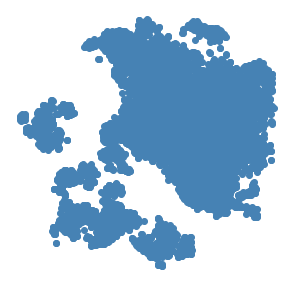

In [22]:
X_embedded = TSNE(n_components=2, random_state=345).fit_transform(X_scaled)
X_embedded.shape
plt.figure(figsize=(5,5))
plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.axis('off')
plt.show()

Figure 3: The 2-dimensional projection of the 77-dimesnional feature space. This type of projection is useful for thinking about how many distinct categories our feature space contains, where points of one category are likely to found near points of the same category, and by the same token, separated from points belonging to a different category. There are clearly at least 4 distinct clusters that can be seen in the structure of the projection. 

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


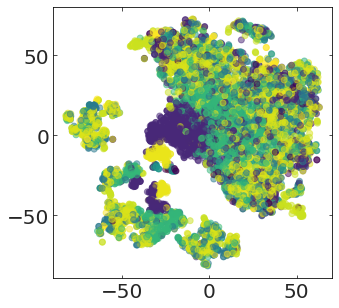

In [23]:
norm_obj= Normalize(vmin=y.min(), vmax=y.max())
len([c for c in plt.cm.RdBu_r(norm_obj(y))]), X_embedded.shape
plt.figure(figsize=(5,5))
plt.scatter(X_embedded[:,0], X_embedded[:,1],  
           color=[c for c in plt.cm.viridis(norm_obj(y))], alpha=0.5);

Figure 4: The same 2D projection as in Fig 3, but each point colored according to target variable. Each grouping of points is quite inhomogenous, however, indictating that structure in the feature space does not map well onto the target variable. 

In [27]:
metadata.columns

Index(['object_id', 'ra', 'decl', 'gal_l', 'gal_b', 'ddf', 'hostgal_specz',
       'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv', 'target'],
      dtype='object')

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


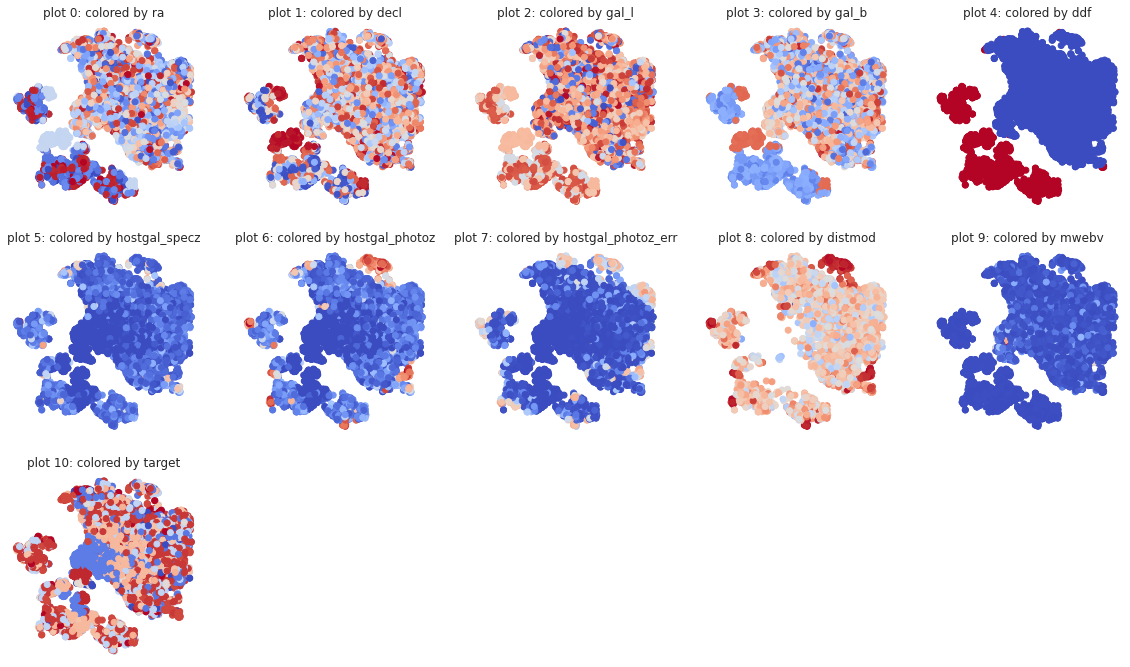

In [28]:
fig = plt.figure(figsize=(20,20))

for i, col in enumerate(metadata.columns[1:]):
    ax = fig.add_subplot(5,5,i+1)
    v = metadata[col].astype(float)
    ax.set_title("plot %d: colored by %s"%(i,col), fontsize=12)
    ax.scatter(X_embedded[:,0], X_embedded[:,1],  
               color=[plt.cm.coolwarm(Normalize(vmin=v.min(), vmax=v.max())(c))
                                                         for c in v])
    ax.axis('off')

Figure 5: Color-coded feature space projections as in Fig 4, but for all metadata columns. The only one with distinct heterogeniety is the binary variable ddf.

# HW6 - Part IIB: Clustering

In [0]:
from sklearn.cluster import AgglomerativeClustering

elements in cluster 0 5782
elements in cluster 1 1
elements in cluster 2 2065



findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


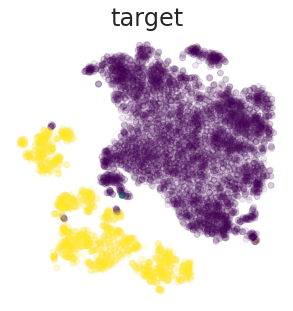

In [31]:
clustering = AgglomerativeClustering(n_clusters=3).fit(X_scaled)

for j in range(3):
    print("elements in cluster {} {}".format(j, (clustering.labels_ == j).sum()))
print()
plt.figure(figsize=(5,5))
plt.title(col)

colors = np.array([plt.cm.viridis(Normalize(vmin=0, vmax=2)(c))
                                                         for c in clustering.labels_])

alpha = np.array([0.1 if (clustering.labels_ == j).sum() > 200 else 1.0 for j in clustering.labels_])

colors[:,3] = alpha
    
plt.scatter(X_embedded[:,0], X_embedded[:,1],
               color=colors);
plt.axis('off')
plt.show()

Figure 6: The 77-dimesnional feature space, colored according the Agglomerative Clustering algorithm, which does a good job of distinguishing between the two main clusters, with a 1-point 3rd cluster due to our choice of n_cluster = 3. 

## Task II.3

elements in cluster 0 7847
elements in cluster 1 1



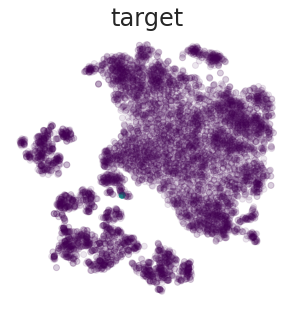

elements in cluster 0 5782
elements in cluster 1 1
elements in cluster 2 2065



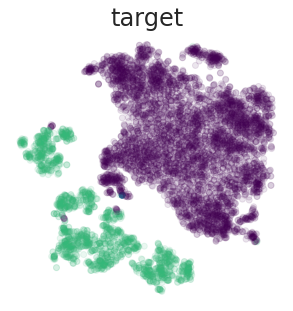

elements in cluster 0 5781
elements in cluster 1 1
elements in cluster 2 2065
elements in cluster 3 1



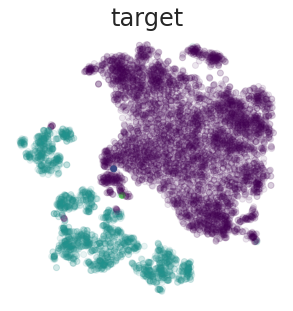

elements in cluster 0 4593
elements in cluster 1 1188
elements in cluster 2 2065
elements in cluster 3 1
elements in cluster 4 1



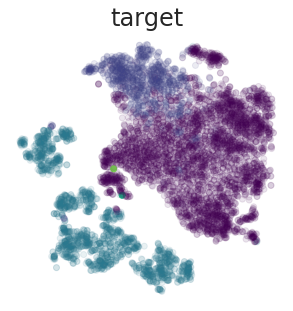

In [32]:
for n in range(2, 6):
  clustering = AgglomerativeClustering(n_clusters=n).fit(X_scaled)

  for j in range(n):
    print("elements in cluster {} {}".format(j, (clustering.labels_ == j).sum()))
  print()
  plt.figure(figsize=(5,5))
  plt.title(col)

  colors = np.array([plt.cm.viridis(Normalize(vmin=0, vmax=n)(c))
                                                         for c in clustering.labels_])

  alpha = np.array([0.1 if (clustering.labels_ == j).sum() > 200 else 1.0 for j in clustering.labels_])

  colors[:,3] = alpha
    
  plt.scatter(X_embedded[:,0], X_embedded[:,1], 
               color=colors);
  plt.axis('off')
  plt.show()  

Figure 7: Agglomerative clustering with n=2,3,4,5 clusters. I find it interesting that we have to set n=3 clusters in order to find the 2nd main cluster, but a third large cluster does not emerge until n=5. In the n=4 and n=5 case, the algorithm mistakenly colors some points in the cyan cluster purple.

## Task II.4

In [0]:
from scipy.spatial.distance import cdist

In [0]:
dist_mat = cdist(X_scaled, X_scaled, metric = 'braycurtis')

In [35]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='precomputed', 
                                    linkage="complete").fit(dist_mat)
for j in range(2, -1, -1):
        print("elements in cluster {} {}".format(j, (clustering.labels_ == j).sum()))

elements in cluster 2 1609
elements in cluster 1 1718
elements in cluster 0 4521


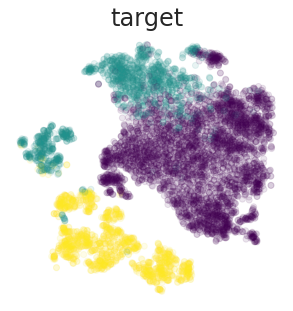

In [36]:
plt.figure(figsize=(5,5))
plt.title(col)

colors = np.array([plt.cm.viridis(Normalize(vmin=0, vmax=2)(c))
                                                         for c in clustering.labels_])

alpha = np.array([0.1 if (clustering.labels_ == j).sum() > 200 else 1.0 for j in clustering.labels_])

colors[:,3] = alpha
    
plt.scatter(X_embedded[:,0], X_embedded[:,1],
               color=colors);
plt.axis('off')
plt.show()

Figure 8: Agglomerative clustering with the 'Braycurtis' distance metric, a statistic originating in biology and ecology and used to quanitify dissimilarity between two populations accounting for counts at each site, and is bounded between the values 0 and 1. Formally: 

$$BC_{ij} = 1 - \frac{2C_{ij}}{S_i + S_j}$$

Where $S_i$ and $S_j$ are the number of counts at each site, and $C_{ij}$ is the sum of the values of 'species' common to both sites. Using this metric, the clustering algorithm identifies part of the previously-yellow cluster as belonging to the third cluster that emerged when n=5 clusters were asked for. This may be because the Braycurtis 'distance' is not a distance in the conventional sense, but rather a similarity statistic.

## Extra Credit II

In [0]:
dist_mat_unscaled = cdist(X, X, metric = 'Mahalanobis')

In [38]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='precomputed', 
                                    linkage="complete").fit(dist_mat_unscaled)
for j in range(2, -1, -1):
        print("elements in cluster {} {}".format(j, (clustering.labels_ == j).sum()))

elements in cluster 2 1
elements in cluster 1 1
elements in cluster 0 7846


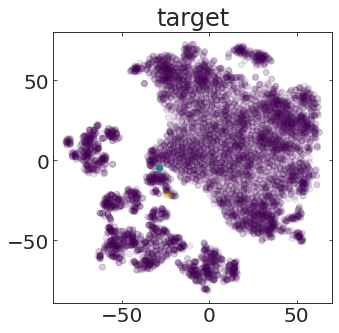

In [39]:
plt.figure(figsize=(5,5))
plt.title(col)

colors = np.array([plt.cm.viridis(Normalize(vmin=0, vmax=2)(c))
                                                         for c in clustering.labels_])

alpha = np.array([0.1 if (clustering.labels_ == j).sum() > 200 else 1.0 for j in clustering.labels_])

colors[:,3] = alpha
    
plt.scatter(X_embedded[:,0], X_embedded[:,1],
               color=colors);
#plt.axis('off')
plt.show()

Figure 9: Clustering (n=3) using the Mahalanobis distance on the unscaled features. The Mahalanobis distance is the number of standard deviations a point is from the mean of a distribtion, which defaults to the standard Euclidean distance of the axes are scaled to have standard deviation 1. Unlike using the Euclidean distance on the scaled features, it fails to capture the 2nd cluster. 

## Extra Credit III

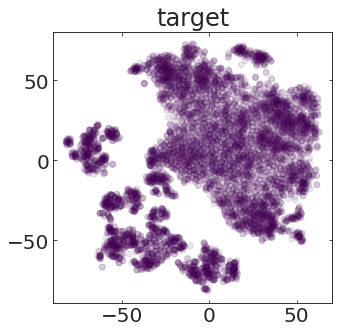

In [45]:
DBclustering = sklearn.cluster.DBSCAN(eps=5, min_samples=50, metric='euclidean', 
                       metric_params=None, algorithm='auto', leaf_size=30).fit(X_scaled)
plt.figure(figsize=(5,5))
plt.title(col)

colors = np.array([plt.cm.viridis(Normalize(vmin=0, vmax=2)(c))
                                                         for c in DBclustering.labels_])

alpha = np.array([0.1 if (DBclustering.labels_ == j).sum() > 200 else 1.0 for j in DBclustering.labels_])

colors[:,3] = alpha
    
plt.scatter(X_embedded[:,0], X_embedded[:,1],
               color=colors);
#plt.axis('off')
plt.show()

Figure 10: DBscan clustering with the following hyperparameters:

eps - the maximum distance between points needed to be in the same cluster. I set eps=5 because that was roughly the order of the smallest separation bewteen visually distinct clumps of points.

min_samples -  the minimum number of neighbours a cluster needs to have to be a cluster (and not an outlier). I chose min_samples = 50 because mowt of the visually obvious clusters have fairly high densities.

Apparently my choice of parameters is ill-suited since the DBscan is failing to distinguish more than 1 cluster. 

# Part IIB: Classifying

## Task II5:

In [0]:
print("breakdown between surveys {} {}".format(
    (metadata.ddf == 1).sum(), (metadata.ddf == 0).sum()))

breakdown between surveys 2116 5732


In [0]:
X.loc[X['ddf'] == 1]

,"(0, mean)","(0, std)","(0, m2)","(0, m3)","(0, max)","(0, min)","(0, median)","(0, slopes)","(0, intercepts)","(0, ll1)","(0, ll3)","(1, mean)","(1, std)","(1, m2)","(1, m3)","(1, max)","(1, min)","(1, median)","(1, slopes)","(1, intercepts)","(1, ll1)","(1, ll2)","(1, ll3)","(2, mean)","(2, std)","(2, m2)","(2, m3)","(2, max)","(2, min)","(2, median)","(2, slopes)","(2, intercepts)","(2, ll1)","(2, ll2)","(2, ll3)","(3, mean)","(3, std)","(3, m2)","(3, m3)","(3, max)","(3, min)","(3, median)","(3, slopes)","(3, intercepts)","(3, ll1)","(3, ll2)","(3, ll3)","(4, mean)","(4, std)","(4, m2)","(4, m3)","(4, max)","(4, min)","(4, median)","(4, slopes)","(4, intercepts)","(4, ll1)","(4, ll2)","(4, ll3)","(5, mean)","(5, std)","(5, m2)","(5, m3)","(5, max)","(5, min)","(5, median)","(5, slopes)","(5, intercepts)","(5, ll1)","(5, ll2)","(5, ll3)",decl,ddf,hostgal_photoz,hostgal_photoz_err
0,-3.254554,83.944735,6934.865833,72665.792850,125.182808,-116.913223,-0.080537,0.005676,-0.175947,-84.013092,-1.0,-385.699911,601.787302,355904.026224,8.593916e+07,660.626343,-1100.440063,-0.170090,0.014032,-0.399902,-80.867915,-80.869998,-1.0,-134.146566,455.121346,203564.138816,3.040627e+07,611.984558,-681.858887,-0.289021,0.017676,-0.503760,-80.092803,-80.109763,-1.0,-121.103501,335.425053,110570.138947,1.049664e+07,445.737061,-530.644592,-0.122434,0.020475,-0.583524,-79.226482,-79.290039,-1.0,-55.954592,291.803449,83681.162283,4.717542e+06,381.953735,-422.184509,-0.163078,0.022343,-0.636786,-78.160027,-78.480261,-1.0,-47.449847,294.779522,85370.493377,3.041829e+06,378.188141,-422.815094,-0.129163,0.021319,-0.596932,-76.917754,-77.386461,-1.0,-61.943836,1,0.0000,0.0000
1,-2.720398,7.113509,49.879128,89.634243,14.509829,-14.735178,-0.052914,-0.041433,1.429423,-45.801483,-1.0,-1.019804,5.712334,32.048070,-1.551087e+01,9.129021,-11.715749,0.080189,-0.051648,1.420320,-36.052358,-38.161170,-1.0,-0.794238,5.770738,32.706748,-4.127475e+00,10.529041,-10.067919,0.117188,-0.053887,1.481892,-34.410798,-35.611095,-1.0,-0.986966,6.450413,40.864832,-4.249286e+01,11.330316,-12.394593,0.141552,-0.050983,1.402038,-38.701863,-41.302700,-1.0,-0.900262,6.406989,40.316483,-1.597455e+01,9.827934,-12.286801,0.016870,-0.050464,1.387765,-44.424807,-44.870314,-1.0,-1.794175,7.094073,49.427194,7.377121e+01,14.770886,-14.211164,-0.094281,-0.037903,1.042343,-65.167686,-65.424297,-1.0,-27.784405,1,1.6267,0.2552
2,-0.048080,1.828872,3.298318,2.093148,5.942166,-3.459960,0.039463,-0.001798,0.063840,-101.249926,-1.0,0.141057,1.807229,3.203266,2.623669e+00,5.693109,-3.393080,0.016754,0.003167,-0.080770,-72.910038,-73.012277,-1.0,2.400870,5.559483,30.313471,3.864890e+02,20.994711,-2.848838,-0.343392,0.026905,-0.686084,-63.777334,-65.193298,1.0,3.236164,8.191987,65.818099,1.380135e+03,33.572102,-5.435799,-0.314425,0.024491,-0.624531,-66.369632,-66.683538,1.0,4.308728,10.710344,112.462234,2.936931e+03,41.159981,-5.836310,-0.308522,0.022552,-0.563811,-65.239486,-66.161110,1.0,4.539396,13.332758,174.276892,3.751336e+03,47.310059,-19.159811,-0.149763,0.019612,-0.490299,-66.518080,-67.853917,1.0,-6.579593,1,0.2262,0.0157
3,1.797523,4.374445,18.869993,162.368381,18.014029,-3.874349,-0.169349,-0.013089,0.464675,-88.423048,-1.0,5.717394,25.964659,662.124902,1.161627e+05,192.244293,-3.618410,-0.185994,-0.003826,0.105205,-76.313623,-78.932796,-1.0,9.711532,31.957997,1003.075853,1.758302e+05,220.795212,-2.159753,-0.290606,-0.003878,0.106641,-72.846380,-78.938052,-1.0,14.412924,34.967698,1200.905234,1.519142e+05,203.250702,-4.944036,-0.373246,-0.003931,0.108112,-67.105516,-78.945375,-1.0,13.134436,33.069053,1074.034376,1.190633e+05,183.633118,-15.494463,-0.358773,-0.004774,0.131296,-67.067827,-78.924149,-1.0,10.746138,26.060130,666.782529,5.309464e+04,141.513290,-10.249387,-0.306851,-0.002816,0.076043,-64.783463,-77.536999,-1.0,-45.586655,1,0.2813,1.1523
4,0.660948,2.360084,5.481586,-4.160853,5.330927,-6.804703,-0.033864,0.017117,-0.530614,-84.959510,-1.0,4.634637,8.107525,64.598653,1.202103

In [0]:
Xddf = X.loc[X['ddf'] == 1]
Xnormal = X.loc[X['ddf'] == 0]
yddf =  y.loc[X['ddf'] == 1]
ynormal =  y.loc[X['ddf'] == 0]

In [0]:
X_trainddf, X_testddf, y_trainddf, y_testddf = train_test_split(Xddf, yddf, 
                                              test_size=0.6, train_size=0.4, random_state=69)

X_trainnormal, X_testnormal, y_trainnormal, y_testnormal = train_test_split(Xnormal, ynormal, 
                                                          test_size=0.6, train_size=0.4, random_state=69)

## Task II.6

## Task II.7

In [0]:
from sklearn.ensemble import RandomForestClassifier
clfddf = RandomForestClassifier(n_estimators=100, 
                        criterion='gini', max_depth=5).fit(X_trainddf, y_trainddf)
clfnormal = RandomForestClassifier(n_estimators=100, 
                        criterion='gini', max_depth=5).fit(X_trainnormal, y_trainnormal)

In [0]:
print("Random Forest Classification\n" + 
       "score on DDF {:.2f} and on normal survey {:.2f}".format(
           clfddf.score(X_testddf, y_testddf),
           clfnormal.score(X_testnormal, y_testnormal)))

Random Forest Classification
score on DDF 0.74 and on normal survey 0.62


## Confusion matrices

In [0]:
plt.text?

Confusion matrix, without normalization
Normalized confusion matrix


findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


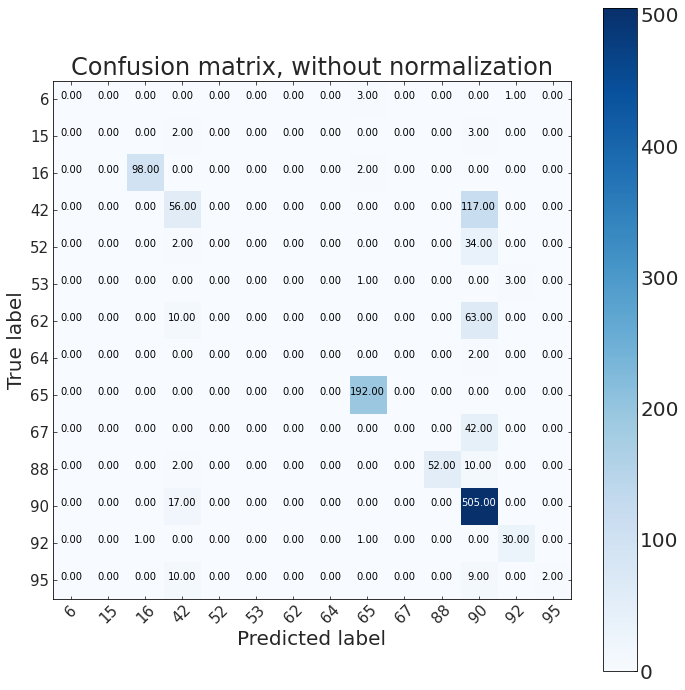

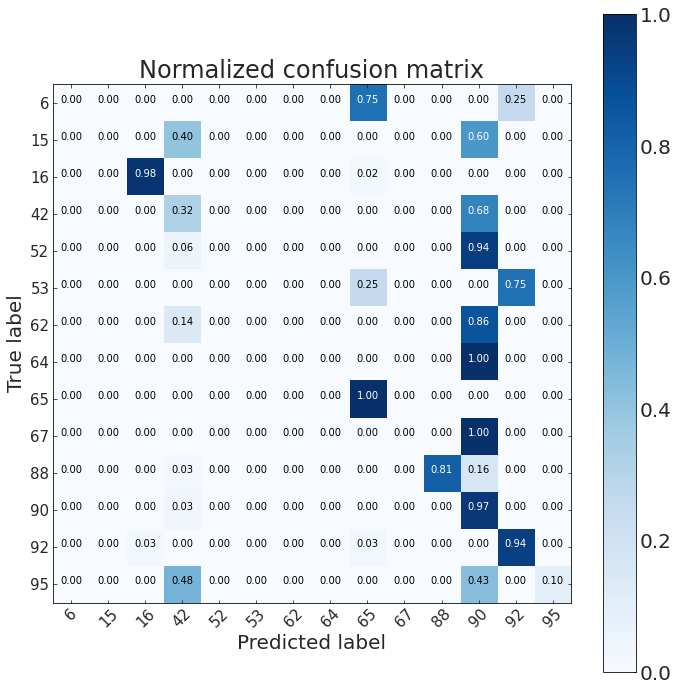

In [0]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "%.2f"%cm[i, j], fontsize=10,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    plt.tight_layout()
    plt.tick_params(labelsize=15) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = sklearn.metrics.confusion_matrix(y_testddf, clfddf.predict(X_testddf))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))

plot_confusion_matrix(cnf_matrix, classes=["%d"%i for i in np.unique(y)],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=["%d"%i for i in np.unique(y)], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
Normalized confusion matrix


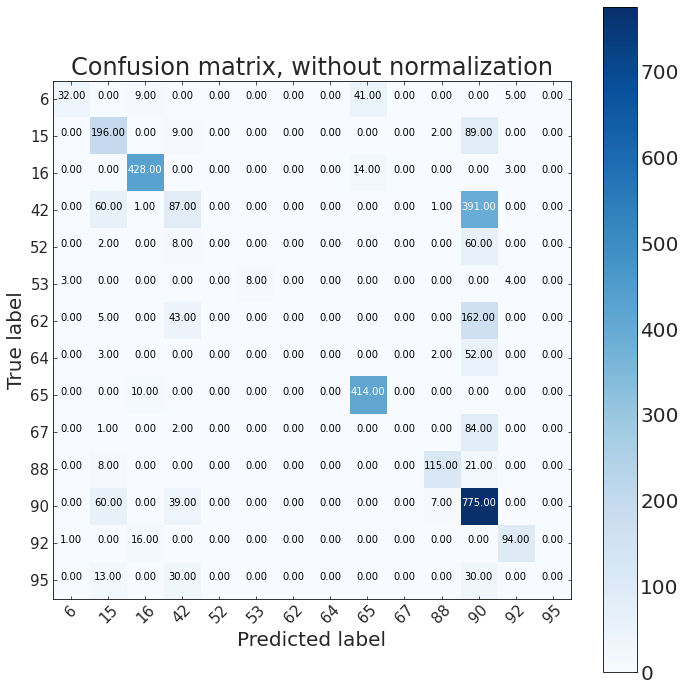

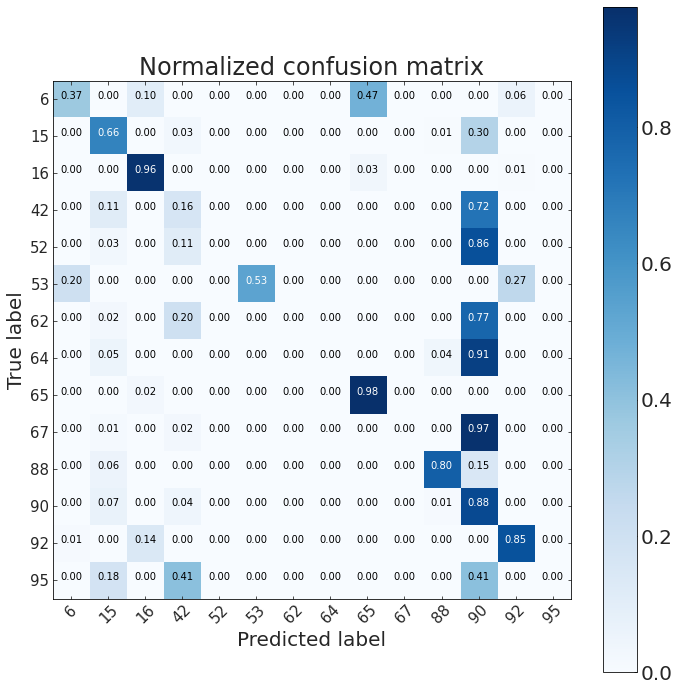

In [0]:
cnf_matrix = sklearn.metrics.confusion_matrix(y_testnormal, clfnormal.predict(X_testnormal))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))

plot_confusion_matrix(cnf_matrix, classes=["%d"%i for i in np.unique(y)],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=["%d"%i for i in np.unique(y)], normalize=True,
                      title='Normalized confusion matrix')

plt.show()